In [114]:
import pandas as pd

In [115]:
train = pd.read_csv('./data/ratings_train.txt', sep='\t')
test = pd.read_csv('./data/ratings_test.txt', sep='\t')

In [116]:
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [117]:
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [118]:
for table in (train, test):
    print('데이터 개수')
    print(table.shape)

    print('nan 여부')
    print(table.isnull()['label'].unique())

    print('중복 데이터 개수')
    print(table.shape[0] - table['document'].nunique())

    print('클래스별 개수')
    print(table.groupby('label').size())

데이터 개수
(150000, 3)
nan 여부
[False]
중복 데이터 개수
3818
클래스별 개수
label
0    75173
1    74827
dtype: int64
데이터 개수
(50000, 3)
nan 여부
[False]
중복 데이터 개수
843
클래스별 개수
label
0    24827
1    25173
dtype: int64


In [119]:
# 실습
# document 컬럼에서 중복 제거
# document 컬럼에서 NaN 값을 제거
# document 컬럼에서 한글, 공백을 제외한 모든 텍스트를 제거
# 1~3번 전처리를 한 뒤, 비어있는 데이터 제거
# 전처리가 끝난 뒤, 데이터 개수 변화를 확인

In [120]:
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [121]:
test[test['document'].isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [122]:
train.shape[0] - train['document'].nunique()

3818

In [123]:
test.shape[0] - test['document'].nunique()

843

In [124]:
train.duplicated().sum()

0

In [125]:
test.duplicated().sum()

0

In [126]:
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [127]:
test[test['document'].isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [128]:
for table in (train, test):
    table.dropna(axis=0, inplace=True)
    print(table.isnull().sum())

id          0
document    0
label       0
dtype: int64
id          0
document    0
label       0
dtype: int64


In [129]:
for table in (train, test):
    table.drop_duplicates(subset=["document"], inplace=True)
    table['document'] = table['document'].str.replace(r'[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '', regex=True)
    table['document'] = table['document'].str.replace(r'[ +]', '', regex=True)
    table['document'] = table['document'].replace('', float('nan'), regex=True)
    table.dropna(how='any', inplace=True)
    
    print('전처리 후 데이터 개수 : ', table.shape)

전처리 후 데이터 개수 :  (145393, 3)
전처리 후 데이터 개수 :  (48852, 3)


In [130]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [131]:
# 형태소 분석
# 1. 불용어 처리
# 2. 한 글자 단어는 제외
# 3. train:test:valid : 4000:2000:1000
# 4. train:test:valid 데이터의 각 클래스별 비율 확인
# 5. train set에서 등장하는 모든 단어 목록 확인하기

In [132]:
f = open('./korean_stopwords.txt', encoding='utf8')
stopwords = f.readlines()
stopwords = [s[:-1] for s in stopwords]
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [133]:
from konlpy.tag import Okt
from tqdm import tqdm # 반복문 로딩 바 출력
import numpy as np

okt = Okt()

In [134]:
X_train = []
y_train = []

for i in tqdm(range(0,4000)):
    sentence = train['document'][i]
    y_train.append(train['label'][i])
    tokenized = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized if not word in stopwords and len(word) > 1]
    if stopwords_removed_sentence == []: continue
    X_train.append(stopwords_removed_sentence)


100%|██████████| 4000/4000 [00:26<00:00, 149.59it/s]


In [135]:
X_test = []
y_test = []

for i in tqdm(range(0,2000)):
    sentence = test['document'][i]
    y_test.append(test['label'][i])
    tokenized = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized if not word in stopwords and len(word) > 1]
    if stopwords_removed_sentence == []: continue
    X_test.append(stopwords_removed_sentence)

100%|██████████| 2000/2000 [00:13<00:00, 153.40it/s]


In [136]:
X_valid = []
y_valid = []

for i in tqdm(range(10000,11000)):
    sentence = test['document'][i]
    y_valid.append(test['label'][i])
    tokenized = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized if not word in stopwords and len(word) > 1]
    if stopwords_removed_sentence == []: continue
    X_valid.append(stopwords_removed_sentence)


100%|██████████| 1000/1000 [00:06<00:00, 160.00it/s]


In [137]:
sum(np.array(y_train))

1997

In [138]:
sum(np.array(y_train) == 0) / len(y_train)

0.50075

In [139]:
# 클래스 비율 확인
for n in ('train', 'test', 'valid'):
    table = globals()['y_' + n]
    print(f'{n} 긍정 데이터 비율 : ', sum(table)/len(table))
    print(f'{n} 부정 데이터 비율 : ', sum(np.array(table) == 0) / len(table))

train 긍정 데이터 비율 :  0.49925
train 부정 데이터 비율 :  0.50075
test 긍정 데이터 비율 :  0.5125
test 부정 데이터 비율 :  0.4875
valid 긍정 데이터 비율 :  0.495
valid 부정 데이터 비율 :  0.505


In [140]:
from collections import Counter

word_list = []

for sent in X_train:
    for word in sent:
        word_list.append(word)

word_count = Counter(word_list)

len(word_count) # 고유 단어 개수

7357

In [141]:
word_count

Counter({'아더': 2,
         '진짜': 228,
         '짜증나다': 36,
         '목소리': 7,
         '포스터': 17,
         '보고': 110,
         '초딩': 11,
         '영화': 1178,
         '오버': 4,
         '연기': 141,
         '가볍다': 11,
         '않다': 194,
         '무재': 6,
         '밓었': 1,
         '다그': 11,
         '래서': 1,
         '보다': 1002,
         '추천': 32,
         '교도소': 1,
         '이야기': 50,
         '구먼': 1,
         '솔직하다': 41,
         '재미': 95,
         '없다': 433,
         '평점': 171,
         '조정': 2,
         '사이': 4,
         '몬페': 1,
         '익살스럽다': 1,
         '돋보이다': 7,
         '스파이더맨': 10,
         '늙다': 3,
         '보이다': 21,
         '하다': 676,
         '크다': 28,
         '스틴던스트': 1,
         '너무나도': 11,
         '이쁘다': 28,
         '걸음': 2,
         '떼다': 11,
         '초등학교': 6,
         '학년': 6,
         '생인': 1,
         '살다': 38,
         'ㅋㅋㅋ': 62,
         '반개': 9,
         '아깝다': 129,
         '원작': 28,
         '긴장감': 18,
         '을제': 1,
         '대로': 12,
         '살

In [142]:
word_count['사람'] # 사람이라은 단어가 등장한 빈도

155

In [143]:
vocab = sorted(word_count, key=word_count.get, reverse=True)
vocab[:10] # 빈출 단어 10개

['영화', '보다', '하다', '없다', '이다', '좋다', '정말', '재밌다', '되다', '너무']

In [144]:
# 빈출 단어 시각화
# 빈도 3번 초과하지 않은 데이터는 제거

In [145]:
word_df = pd.DataFrame.from_dict(word_count, orient='index')

In [146]:
word_df.sort_values(0, ascending=False, inplace=True)

In [147]:
word_df

,0
영화,1178
보다,1002
하다,676
없다,433
이다,354
...,...
ㅡㅡㅋ,1
홍상수,1
전해지다,1
공기,1


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

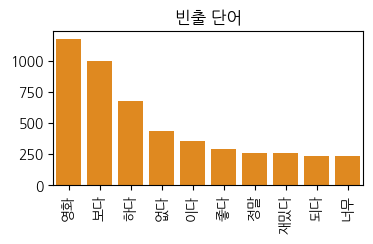

In [149]:
plt.subplots(figsize=(4,2))
sns.barplot(word_df.iloc[:10].T, color='darkorange')
plt.xticks(rotation = 90)
plt.title('빈출 단어')
plt.show()

In [150]:
rm_list= []

for k, v in word_count.items():
    if v <= 3:
        rm_list.append(k)

In [151]:
# 빈도 3회 이하 제거
for X in ('X_train', 'X_test', 'X_valid'):
    globals()[X] = [[x2 for x2 in x if x2 not in rm_list] for x in globals()[X]]

In [152]:
for x in X_train:
    if x == []:
        print('!')

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


In [153]:
# 빈 텍스트 제외
for t in ('train', 'test', 'valid'):
    rng = len(globals()['X_'+ t])

    globals()['X2_' + t] = []
    globals()['y2_' + t] = []

    for i in range(rng):
        if globals()['X_' + t][i] == []:
            continue
        else:
            globals()['X2_' + t].append(globals()['X_' + t][i])
            globals()['y2_' + t].append(globals()['y_' + t][i])


In [154]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1


In [155]:
word_to_index

{'<PAD>': 0, '<UNK>': 1}

In [156]:
vocab

['영화',
 '보다',
 '하다',
 '없다',
 '이다',
 '좋다',
 '정말',
 '재밌다',
 '되다',
 '너무',
 '진짜',
 '아니다',
 '않다',
 '평점',
 '사람',
 '최고',
 '드라마',
 '연기',
 '나오다',
 '이영화',
 '스토리',
 '아깝다',
 '생각',
 '하고',
 '만들다',
 '재미없다',
 '감동',
 'ㅋㅋ',
 '재미있다',
 '들다',
 '배우',
 '감독',
 '보고',
 '그냥',
 '모르다',
 '재미',
 '지루하다',
 '가다',
 '쓰레기',
 '작품',
 '그렇다',
 '주다',
 '정도',
 '오다',
 '사랑',
 '자다',
 '주인공',
 '알다',
 '이렇게',
 '이나',
 '액션',
 'ㅠㅠ',
 '마지막',
 '싶다',
 '완전',
 '내용',
 '역시',
 'ㅋㅋㅋ',
 '최악',
 '남다',
 '안되다',
 'ㅡㅡ',
 '연출',
 '이렇다',
 '남자',
 '느낌',
 '많다',
 '인데',
 '넘다',
 '버리다',
 '멋지다',
 '처음',
 '차다',
 '먹다',
 '이건',
 '느끼다',
 '이야기',
 '인생',
 '좋아하다',
 '명작',
 '많이',
 '라고',
 '한번',
 '되어다',
 '아름답다',
 '괜찮다',
 '받다',
 '가슴',
 '현실',
 '죽다',
 '늘다',
 '높다',
 '말다',
 '끄다',
 '야하다',
 '다시',
 '나다',
 '소재',
 '장면',
 '솔직하다',
 '아쉽다',
 'ㅎㅎ',
 '맞다',
 '기억',
 '지금',
 '허다',
 '마음',
 '살다',
 '해주다',
 '결말',
 '별로',
 '어리다',
 '낮다',
 '수준',
 '보여주다',
 '쓰다',
 '모든',
 '라는',
 '짜증나다',
 '웃기다',
 '뻔하다',
 '때문',
 '무섭다',
 '공감',
 '자체',
 '보기',
 '표현',
 '매력',
 '어떻다',
 '이고',
 '찍다',
 '끝나다',
 '유치하다',
 '여자',
 '추천',
 '처럼'

In [157]:
word_list = []

for sent in X_train:
    for word in sent:
        word_list.append(word)

word_count = Counter(word_list)

len(word_count) # 고유 단어 개수

vocab = sorted(word_count, key=word_count.get, reverse=True)

In [158]:
for idx, word in enumerate(vocab):
    word_to_index[word] = idx + 2

In [159]:
word_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 '영화': 2,
 '보다': 3,
 '하다': 4,
 '없다': 5,
 '이다': 6,
 '좋다': 7,
 '정말': 8,
 '재밌다': 9,
 '되다': 10,
 '너무': 11,
 '진짜': 12,
 '아니다': 13,
 '않다': 14,
 '평점': 15,
 '사람': 16,
 '최고': 17,
 '드라마': 18,
 '연기': 19,
 '나오다': 20,
 '이영화': 21,
 '스토리': 22,
 '아깝다': 23,
 '생각': 24,
 '하고': 25,
 '만들다': 26,
 '재미없다': 27,
 '감동': 28,
 'ㅋㅋ': 29,
 '재미있다': 30,
 '들다': 31,
 '배우': 32,
 '감독': 33,
 '보고': 34,
 '그냥': 35,
 '모르다': 36,
 '재미': 37,
 '지루하다': 38,
 '가다': 39,
 '쓰레기': 40,
 '작품': 41,
 '그렇다': 42,
 '주다': 43,
 '정도': 44,
 '오다': 45,
 '사랑': 46,
 '자다': 47,
 '주인공': 48,
 '알다': 49,
 '이렇게': 50,
 '이나': 51,
 '액션': 52,
 'ㅠㅠ': 53,
 '마지막': 54,
 '싶다': 55,
 '완전': 56,
 '내용': 57,
 '역시': 58,
 'ㅋㅋㅋ': 59,
 '최악': 60,
 '남다': 61,
 '안되다': 62,
 'ㅡㅡ': 63,
 '연출': 64,
 '이렇다': 65,
 '남자': 66,
 '느낌': 67,
 '많다': 68,
 '인데': 69,
 '넘다': 70,
 '버리다': 71,
 '멋지다': 72,
 '처음': 73,
 '차다': 74,
 '먹다': 75,
 '이건': 76,
 '느끼다': 77,
 '이야기': 78,
 '인생': 79,
 '좋아하다': 80,
 '명작': 81,
 '많이': 82,
 '라고': 83,
 '한번': 84,
 '되어다': 85,
 '아름답다': 86,
 '괜찮다': 87,
 '받

In [160]:
# 인코딩
def text_to_seq(X, word_to_index=word_to_index):
    X_enc = []

    for sent in X:
        idx_seq = []

        for word in sent:
            try:
                idx_seq.append(word_to_index[word])
            except KeyError:
                idx_seq.append(word_to_index['<UNK>'])

        X_enc.append(idx_seq)

    return X_enc


In [161]:
X2_train = text_to_seq(X2_train)

X2_test = text_to_seq(X2_test)

X2_valid = text_to_seq(X2_valid)

In [168]:
X2_train

[[12, 120, 674],
 [282, 34, 439, 2, 1087, 19, 440, 14],
 [762, 441, 3, 136],
 [78, 101, 37, 5, 15],
 [1088, 19, 675, 2, 487, 232, 4, 157, 442, 158, 232],
 [443, 763, 764, 109, 2, 59, 530, 23],
 [159, 270, 399, 257, 4],
 [530,
  23,
  20,
  19,
  1089,
  213,
  8,
  400,
  531,
  349,
  324,
  488,
  488,
  18,
  182,
  5,
  19,
  16],
 [52, 5, 30, 62, 2],
 [15, 114, 1090, 350, 11],
 [6, 12, 6],
 [532, 300, 676, 91, 258, 765, 444, 909, 677, 6],
 [910, 259, 20, 19, 445, 4],
 [1091, 7, 1092, 593, 3, 3, 441, 16, 6],
 [533, 12, 911, 164, 2, 260, 301, 28, 22, 1093, 28, 1093],
 [766, 10, 53],
 [74, 16, 121, 83, 95, 205, 767, 441, 95, 137, 232],
 [768, 150, 271, 37, 912],
 [1094, 195, 14, 47],
 [138, 594, 196, 13],
 [151, 35, 1095, 1096, 2, 196, 13],
 [3, 147, 14],
 [27,
  38,
  1097,
  2,
  69,
  25,
  70,
  1097,
  3,
  37,
  5,
  1097,
  20,
  401,
  4,
  92,
  531,
  20,
  63],
 [196, 769, 2, 13, 272, 138, 534],
 [595, 7, 535, 38],
 [95, 1098, 4, 5, 42, 42, 95],
 [71, 96],
 [489],
 [64, 19

In [162]:
word_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 '영화': 2,
 '보다': 3,
 '하다': 4,
 '없다': 5,
 '이다': 6,
 '좋다': 7,
 '정말': 8,
 '재밌다': 9,
 '되다': 10,
 '너무': 11,
 '진짜': 12,
 '아니다': 13,
 '않다': 14,
 '평점': 15,
 '사람': 16,
 '최고': 17,
 '드라마': 18,
 '연기': 19,
 '나오다': 20,
 '이영화': 21,
 '스토리': 22,
 '아깝다': 23,
 '생각': 24,
 '하고': 25,
 '만들다': 26,
 '재미없다': 27,
 '감동': 28,
 'ㅋㅋ': 29,
 '재미있다': 30,
 '들다': 31,
 '배우': 32,
 '감독': 33,
 '보고': 34,
 '그냥': 35,
 '모르다': 36,
 '재미': 37,
 '지루하다': 38,
 '가다': 39,
 '쓰레기': 40,
 '작품': 41,
 '그렇다': 42,
 '주다': 43,
 '정도': 44,
 '오다': 45,
 '사랑': 46,
 '자다': 47,
 '주인공': 48,
 '알다': 49,
 '이렇게': 50,
 '이나': 51,
 '액션': 52,
 'ㅠㅠ': 53,
 '마지막': 54,
 '싶다': 55,
 '완전': 56,
 '내용': 57,
 '역시': 58,
 'ㅋㅋㅋ': 59,
 '최악': 60,
 '남다': 61,
 '안되다': 62,
 'ㅡㅡ': 63,
 '연출': 64,
 '이렇다': 65,
 '남자': 66,
 '느낌': 67,
 '많다': 68,
 '인데': 69,
 '넘다': 70,
 '버리다': 71,
 '멋지다': 72,
 '처음': 73,
 '차다': 74,
 '먹다': 75,
 '이건': 76,
 '느끼다': 77,
 '이야기': 78,
 '인생': 79,
 '좋아하다': 80,
 '명작': 81,
 '많이': 82,
 '라고': 83,
 '한번': 84,
 '되어다': 85,
 '아름답다': 86,
 '괜찮다': 87,
 '받

In [163]:
index_to_word = {}

for k, v in word_to_index.items():
    index_to_word[v] = k

In [164]:
index_to_word

{0: '<PAD>',
 1: '<UNK>',
 2: '영화',
 3: '보다',
 4: '하다',
 5: '없다',
 6: '이다',
 7: '좋다',
 8: '정말',
 9: '재밌다',
 10: '되다',
 11: '너무',
 12: '진짜',
 13: '아니다',
 14: '않다',
 15: '평점',
 16: '사람',
 17: '최고',
 18: '드라마',
 19: '연기',
 20: '나오다',
 21: '이영화',
 22: '스토리',
 23: '아깝다',
 24: '생각',
 25: '하고',
 26: '만들다',
 27: '재미없다',
 28: '감동',
 29: 'ㅋㅋ',
 30: '재미있다',
 31: '들다',
 32: '배우',
 33: '감독',
 34: '보고',
 35: '그냥',
 36: '모르다',
 37: '재미',
 38: '지루하다',
 39: '가다',
 40: '쓰레기',
 41: '작품',
 42: '그렇다',
 43: '주다',
 44: '정도',
 45: '오다',
 46: '사랑',
 47: '자다',
 48: '주인공',
 49: '알다',
 50: '이렇게',
 51: '이나',
 52: '액션',
 53: 'ㅠㅠ',
 54: '마지막',
 55: '싶다',
 56: '완전',
 57: '내용',
 58: '역시',
 59: 'ㅋㅋㅋ',
 60: '최악',
 61: '남다',
 62: '안되다',
 63: 'ㅡㅡ',
 64: '연출',
 65: '이렇다',
 66: '남자',
 67: '느낌',
 68: '많다',
 69: '인데',
 70: '넘다',
 71: '버리다',
 72: '멋지다',
 73: '처음',
 74: '차다',
 75: '먹다',
 76: '이건',
 77: '느끼다',
 78: '이야기',
 79: '인생',
 80: '좋아하다',
 81: '명작',
 82: '많이',
 83: '라고',
 84: '한번',
 85: '되어다',
 86: '아름답다',
 87: '괜찮다',
 88

In [165]:
# 디코딩
def seq_to_text(X, index_to_word=index_to_word):
    X_dec = []

    for sent in X:
        idx_seq = []

        for word in sent:
            idx_seq.append(index_to_word[word])

        X_dec.append(idx_seq)

    return X_dec

In [166]:
seq_to_text(X2_train)

[['진짜', '짜증나다', '목소리'],
 ['포스터', '보고', '초딩', '영화', '오버', '연기', '가볍다', '않다'],
 ['무재', '다그', '보다', '추천'],
 ['이야기', '솔직하다', '재미', '없다', '평점'],
 ['사이', '연기', '돋보이다', '영화', '스파이더맨', '보이다', '하다', '크다', '너무나도', '이쁘다', '보이다'],
 ['떼다', '초등학교', '학년', '살다', '영화', 'ㅋㅋㅋ', '반개', '아깝다'],
 ['원작', '긴장감', '대로', '살리다', '하다'],
 ['반개',
  '아깝다',
  '나오다',
  '연기',
  '몇년',
  '인지',
  '정말',
  '해도',
  '그것',
  '보단',
  '낫다',
  '반복',
  '반복',
  '드라마',
  '가족',
  '없다',
  '연기',
  '사람'],
 ['액션', '없다', '재미있다', '안되다', '영화'],
 ['평점', '낮다', '헐리우드', '화려하다', '너무'],
 ['이다', '진짜', '이다'],
 ['볼때', '마다', '눈물나다', '죽다', '년대', '자극', '감성', '절제', '멜로', '이다'],
 ['뛰다', '치다', '나오다', '연기', '드럽다', '하다'],
 ['깔끔하다', '좋다', '기사', '로만', '보다', '보다', '다그', '사람', '이다'],
 ['취향', '진짜', '내생', '극장', '영화', '가장', '노잼', '감동', '스토리', '어거지', '감동', '어거지'],
 ['긴장', '되다', 'ㅠㅠ'],
 ['차다', '사람', '웃기다', '라고', '끄다', '이라고', '깔다', '다그', '끄다', '처럼', '보이다'],
 ['표절', '이해', '갈수록', '재미', '없어지다'],
 ['이건정', '캐스팅', '않다', '자다'],
 ['이라', '착하다', '절대', '아니다'],
 ['나름', '그냥', '학생',

In [169]:
# 패딩
def pad_seq(sentences, max_len = 30):
    features = np.zeros((len(sentences), max_len), dtype=int)
    for idx, sentence in enumerate(sentences):
        if len(sentence) != 0:
            features[idx, :len(sentence)] = np.array(sentence)[:max_len]

    return features

In [171]:
X_train_pad = pad_seq(X2_train)
X_test_pad = pad_seq(X2_test)
X_valid_pad = pad_seq(X2_valid)

In [172]:
import torch


In [173]:
device = torch.device('cpu')

In [184]:
train_label_tensor = torch.tensor(np.array(y2_train))
test_label_tensor = torch.tensor(np.array(y2_test))
valid_label_tensor = torch.tensor(np.array(y2_valid))

In [185]:
class TextClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
            super(TextClassifier, self).__init__()
            self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
            self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
            self.fc = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x: batch_size, seq_length
        embedded = self.embedding(x)

        lstm_out,  (hidden, cell) = self.lstm(embedded)

        last_hidden = hidden.squeeze(0)
        logits = self.fc(last_hidden)
        return logits

In [186]:
len(word_to_index)

1374

In [187]:
embedding_dim = 100
hidden_dim = 128
output_dim = 2 # binary classification
learning_rate = 0.01
num_epochs = 10
vocab_size = len(word_to_index)

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(1374, 100)
  (lstm): LSTM(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [188]:
encoded_train = torch.tensor(X_train_pad).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor) # train_label_tensor : y2_train
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(X_test_pad).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor) # test_label_tensor : y2_test
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=32)

encoded_valid = torch.tensor(X_valid_pad).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor) # valid_label_tensor : y2_valid
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=32)

In [191]:
len(train_dataloader) * 32

3904

In [192]:
len(encoded_train)

3891

In [193]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [194]:
def calcculate_acc(logits, labels):
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    acc = correct / total
    return acc

In [195]:
def evaluate(model, valid_dataloader, criterion = criterion, device=device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            logits = model(batch_X)
            loss = criterion(logits, batch_y)

            val_loss += loss.item()
            val_correct += calcculate_acc(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_acc = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_acc

In [203]:
best_val_loss = float('inf')

for epoch in range(num_epochs):
    train_loss, train_correct, train_total = 0,0,0
    model.train()

    for batch_X, batch_y in train_dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        logits = model(batch_X)
        loss = criterion(logits, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_correct += calcculate_acc(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_acc = train_correct / train_total
    train_loss /= len(train_dataloader)

    val_loss, val_acc = evaluate(model, valid_dataloader)

    print(f'epoch : {epoch+1} / {num_epochs}')
    print(f'train loss : {train_loss:.3f}, train acc : {train_acc:.3f}')
    print(f'valid loss : {val_loss:.3f}, valid acc : {val_acc:.3f}')

    if val_loss < best_val_loss:
        print(f'best val.loss saved; valid loss : {val_loss:.3f}, valid acc : {val_acc:.3f}')
        best_val_loss = val_loss
        torch.save(model.state_dict(), './best_model.pth')


epoch : 1 / 10
train loss : 0.185, train acc : 0.923
valid loss : 1.866, valid acc : 0.497
best val.loss saved; valid loss : 1.866, valid acc : 0.497
epoch : 2 / 10
train loss : 0.193, train acc : 0.919
valid loss : 1.911, valid acc : 0.523
epoch : 3 / 10
train loss : 0.178, train acc : 0.927
valid loss : 1.937, valid acc : 0.527
epoch : 4 / 10
train loss : 0.187, train acc : 0.921
valid loss : 1.875, valid acc : 0.516
epoch : 5 / 10
train loss : 0.183, train acc : 0.925
valid loss : 1.940, valid acc : 0.512
epoch : 6 / 10
train loss : 0.177, train acc : 0.926
valid loss : 1.910, valid acc : 0.526
epoch : 7 / 10
train loss : 0.173, train acc : 0.925
valid loss : 1.927, valid acc : 0.507
epoch : 8 / 10
train loss : 0.157, train acc : 0.934
valid loss : 2.016, valid acc : 0.495
epoch : 9 / 10
train loss : 0.159, train acc : 0.936
valid loss : 2.020, valid acc : 0.496
epoch : 10 / 10
train loss : 0.164, train acc : 0.932
valid loss : 1.909, valid acc : 0.517


In [204]:
model.load_state_dict(torch.load('./best_model.pth'))

C:\Users\user\AppData\Local\Temp\ipykernel_13084\3794482924.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./best_model.pth'))


<All keys matched successfully>

In [205]:
model.to(device)

TextClassifier(
  (embedding): Embedding(1374, 100)
  (lstm): LSTM(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [206]:
test_loss, test_acc = evaluate(model, test_dataloader)

In [207]:
print(test_loss, test_acc)

1.9132162467125924 0.5012671059300557


In [216]:
def predict(text, model, word_to_index=word_to_index):
    model.eval()

    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if not word in stopwords]
    token_indices = [word_to_index.get(token, 1) for token in tokens]

    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device) # long == int64

    with torch.no_grad():
        logits = model(input_tensor)

    pred_idx = torch.argmax(logits, dim = 1)

    return pred_idx

In [244]:
if int(predict('이딴게 영화냐 ㅉㅉ', model)) == 0:
    print('부정적 리뷰')
else:
    print('긍정적 리뷰')

부정적 리뷰
